Saving bank.csv to bank (25).csv


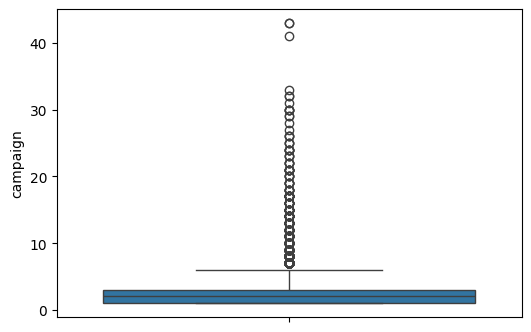

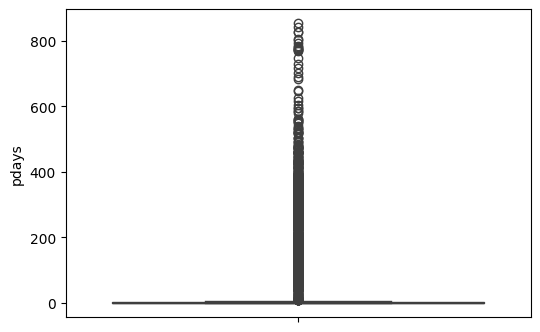

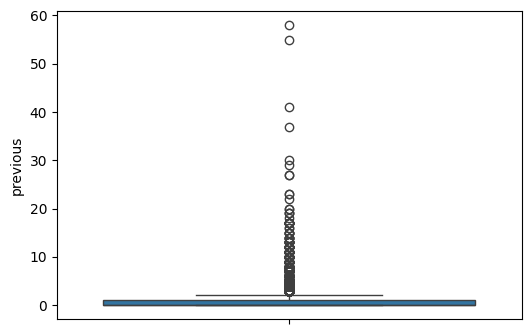

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
upload = files.upload()
import pandas as pd
df = pd.read_csv('bank.csv', low_memory=False)
df.describe()
# --> Kết quả sau khi describe: (1) "balance": cắt outlier, (2) "campaign": group “>10 lần” thành 1 category, (3) "pdays" có outlier -1: chuyển thành categorical ('never contact'), (4) "previous" outlier 58: group, (5) Encode bớt các cột type là boolean

# (1) "balance": cắt outlier
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
df.describe()

# (2) "campaign": group “>10 lần” thành 1 category
## Vẽ boxplot để xác định phân bổ nhằm xác định bins
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(y=df['campaign'])
plt.show()
## Group
df['campaign_group'] = pd.cut(df['campaign'], bins= [0, 5, 10, df['campaign'].max()], labels=["1 to 5", "6 to 10", "More than 10"], right=True, include_lowest=True)

# (3) "pdays" có outlier -1: chuyển thành categorical
## Vẽ boxplot để xác định phân bổ nhằm xác định bins
plt.figure(figsize=(6,4))
sns.boxplot(y=df['pdays'])
plt.show()
## Tách -1 thành category "never contact"
df['pdays_group'] = df['pdays'].replace(-1, "Never contact")
## Phần còn lại group lại tương tự campaign
df.loc[df['pdays'] > 0, 'pdays_group'] = pd.cut(df['pdays'], bins= [0, 30, 90, 180, 365, df['pdays'].max()], labels= ["< 30d", "30 - 89d", "90 - 179d", "180 - 365d", ">= 365d"], include_lowest=True)

# (4) "previous" outlier 58: group
## Vẽ boxplot để xác định phân bổ nhằm xác định bins
plt.figure(figsize=(6,4))
sns.boxplot(y=df['previous'])
plt.show()
## Group tương tự campaign
df['previous_group'] = pd.cut(df['previous'], bins= [0, 5, 10, 20, df['previous'].max()], labels= ['0 to 5d', '6 to 10d', '11 to 20', 'More than 20'], right= True, include_lowest=True)

# Encode bớt các cột type là boolean
for col in ['default', 'housing', 'loan', 'deposit']:
  df[col] = df[col].map({"yes": 1, "no": 0})
df.head()

# Export data
df.to_csv('bank_cleaned.csv', index=False)
files.download('bank_cleaned.csv')